| Problème constaté                                | Explication                   | Solution proposée                                                                |
| ------------------------------------------------ | ----------------------------- | -------------------------------------------------------------------------------- |
| **Trop de colonnes de noms** (`nom`, etc.)       | Infos doublons                | Garder un champ unique (`ville_nom`) + table synonymes si besoin                 |
| **Colonnes techniques vieilles** (`soundex`)     | Peu utiles, lourdes           | Supprimer et utiliser vrai moteur de recherche (Elasticsearch, trigrammes, etc.) |
| **Plusieurs codes postaux dans une cellule**     | Mauvaise structure            | Faire une table `ville_code_postal` liée (1-N)                                   |
| **Pas de clé primaire claire**                   | Identifiant unique pas défini | Définir `PRIMARY KEY (ville_id)` et idem pour département                        |
| **Lien ville ↔ département en texte**            | Risque d’erreur               | Utiliser clé étrangère `FOREIGN KEY (ville_departement)`                         |
| **Colonnes cantons/arrondissements obsolètes**   | Réforme → peu utiles          | Supprimer ou migrer vers données INSEE actuelles                                 |
| **Encodage non uniforme** (`utf8` / `utf8mb4`)   | Mélange incohérent            | Tout passer en `utf8mb4`                                                         |
| **Population avec plusieurs années en colonnes** | Vieillit vite, peu flexible   | Table `population(ville_id, année, valeur)` séparée                              |

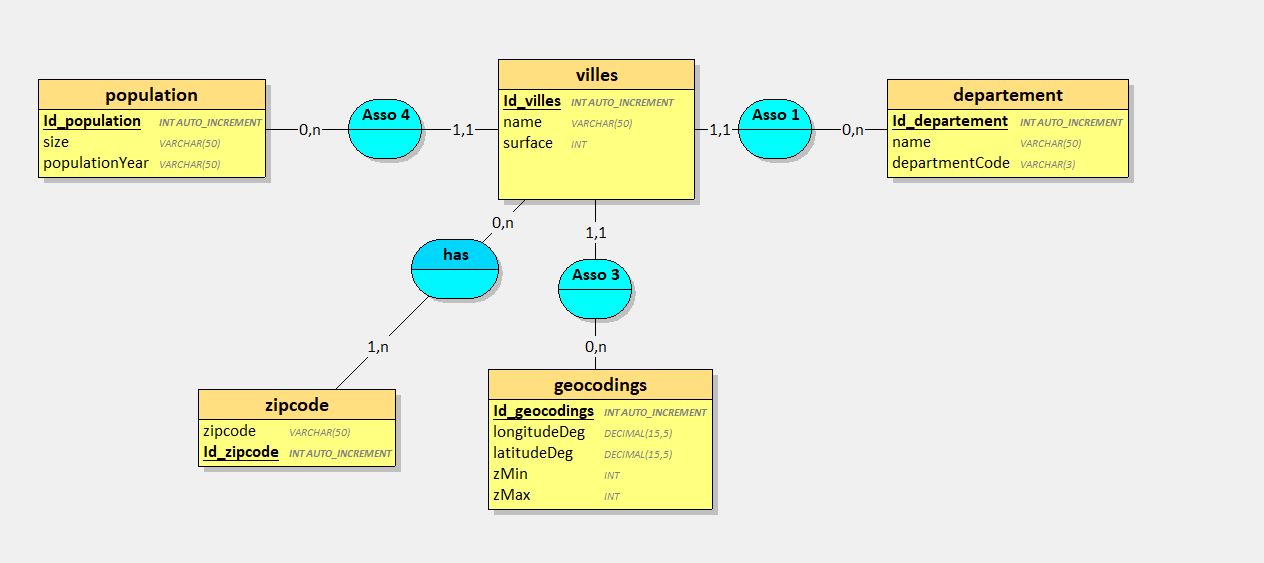

In [ ]:
SELECT COUNT(*) as Total FROM villes;

In [ ]:
SELECT AVG(villes.surface/population.size) as MoyDensite FROM villes INNER JOIN population ON population.ville_id = villes.id WHERE population.year = "2010" AND
SELECT AVG(population.size) as MoyPopulation FROM villes INNER JOIN population ON population.ville_id = villes.id WHERE population.year = "2012";
//chat gpt//

SELECT 
    (SELECT AVG(v.surface / p.size)
     FROM villes v
     INNER JOIN population p ON p.ville_id = v.id
     WHERE p.year = 2010) AS MoyDensite,
     
    (SELECT AVG(p.size)
     FROM villes v
     INNER JOIN population p ON p.ville_id = v.id
     WHERE p.year = 2012) AS MoyPopulation;

In [ ]:
SELECT LOWER(name) AS Nom
FROM villes
WHERE id BETWEEN 
    (SELECT MIN(id) FROM villes)
    AND 
    (SELECT MAX(id) FROM villes)
ORDER BY RAND()
LIMIT 1;

In [ ]:
SELECT REPLACE(LOWER(villes.name), "ville", "city") as Nom FROM villes WHERE villes.name LIKE "%ville%";

In [ ]:
SELECT SUM(villes_france_free.ville_population_2010) total, departement.departement_code FROM villes_france_free INNER JOIN departement ON villes_france_free.ville_departement = departement.departement_code GROUP BY departement.departement_code;

In [ ]:
SELECT departement.departement_nom as Nom, SUM(villes_france_free.ville_population_2010) total FROM villes_france_free INNER JOIN departement ON villes_france_free.ville_departement = departement.departement_code GROUP BY departement.departement_nom HAVING total > 2000000;

In [ ]:
SELECT departement.departement_nom as Nom, COUNT(villes_france_free.ville_id) total FROM villes_france_free INNER JOIN departement ON villes_frSELECT COUNT(*) AS Total, departement.departement_nom as NomDepartement FROM villes_france_free INNER JOIN departement ON villes_france_free.ville_departement = departement.departement_code GROUP BY departement.departement_nom ORDER BY Total DESC LIMIT 1;ance_free.ville_departement = departement.departement_code GROUP BY departement.departement_nom ORDER BY total DESC LIMIT 1;

In [ ]:
SELECT villes_france_free.ville_densite_2010 AS Densite, departement.departement_nom as NomDepartement FROM villes_france_free INNER JOIN departement ON villes_france_free.ville_departement = departement.departement_code ORDER BY Densite LIMIT 1;